___

<p style="font-size:xx-large; font-weight: bold; line-height: 1.2;">
    City of Tucson's Climate Action and Adaptation Plan Community Survey
</p>

___

**Preguntas abiertas:**

Do you have other climate mitigation ideas? Submit here:

Do you have other climate adaptation ideas? Submit here:

Do you have other ideas for environmental equity, justice, and community resilience? Submit here:

Do you have other policy ideas? Submit here:

Are you interested in participating in any other ways to help make Tucson environmentally sustainable? Submit here:

Is there anything else you would like to share that was not already addressed?

# Preparación de los datos

In [ ]:
# Importa las librerías necesarias.
import pandas as pd

In [ ]:
# Lee el dataset.
df = pd.read_csv(r'tucson-caapcs-2021-05-13-20-45_2.csv', encoding='latin-1')

In [ ]:
# Renombra las columnas para que los encabezados queden más compactos.
new_col_names = {
    'Survey ID': 'id',
    'Signature': 'signature',
    'Location': 'location',
    'State': 'state',
    'Created At': 'created_at',
    'Do you (check all that apply)': 'relation_with_tucson',
    'What is your age? ': 'age',
    'With which racial and ethnic group do you identify? (select all that apply)': 'ethnic',
    'How do you describe your gender identity?': 'gender',
    'How important is the issue of global warming to you personally?': 'global_warming_importance',
    'Which Energy strategies do you support having the city implement to reduce greenhouse gas emissions? ': 'energy_strategies',
    'Which Planning and Development strategies do you support having the city implement to reduce greenhouse gas emissions?': 'planning_strategies',
    'Which Transportation strategies do you support having the city implement to reduce greenhouse gas emissions? ': 'transportation_strategies',
    'Which Waste strategies do you support having the city implement to reduce greenhouse gas emissions? ': 'waste_strategies',
    'Do you have other climate mitigation ideas? Submit here:': 'climate_mitigation_ideas',
    'Which of the following climate change hazards are you most concerned about?': 'climate_change_concerned',
    'I would prefer that the city implement climate actions and programs thatâ¦ ': 'preferred_climate_actions',
    'Do you have other climate adaptation ideas? Submit here:': 'climate_adaptation_ideas',
    'How important is it to see equity being incorporated into the Climate Action Plan? ': 'importance_of_equity',
    'Which of the following actions would you support the city implementing into the climate action plan in an effort towards reaching equity?': 'actions_for_equity',
    'Do you have other ideas for environmental equity, justice, and community resilience? Submit here:': 'environmental_equity_ideas',
    'I would support the city implementing climate actions and programs that: ': 'climate_actions_and_programs_that',
    'Do you have other policy ideas? Submit here:': 'policy_ideas',
    'I am interested in participating in the following to do my part to help make Tucson environmentally sustainable:': 'sustainable_interests',
    'Are you interested in participating in any other ways to help make Tucson environmentally sustainable? Submit here:': 'environment_sustainable_ideas',
    'What is your zip or postal code?': 'postal_code',
    'What is your current employment/occupation status? (select all that apply)': 'employment_status',
    'What is the highest degree or level of school that you have completed?': 'school_level',
    'Do you rent or own the place you reside? ': 'pays_rent',
    'What is your total household income? ': 'household_income',
    'Is there anything else you would like to share that was not already addressed?': 'other_ideas',
}

df.rename(columns=new_col_names, inplace=True)

In [ ]:
# Muestra los nombres de las columnas.
for column in df.columns:
    print(column)

In [ ]:
# Muestra algunos ejemplos de registros.
df.head(5)

## Pre-visualización

In [ ]:
# Importa las librerías necesarias.
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Descarga los elementos de NLTK necesarios.
nltk.download([
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
])

In [ ]:
# Esta celda contiene funciones de utilidad para la preparación de los datos para el
# análisis de texto.

def get_unwanted_words():
    """
    Genera la lista de palabras irrelevantes para el análisis de sentimientos y que 
    por tanto se ignorarán. Entre estos tipos de palabras se encuentran artículos, 
    pronombres, preposiciones, conjunciones y palabras definidas por nosotros mismos.
    """
    unwanted = nltk.corpus.stopwords.words("english")
    unwanted.extend([w.lower() for w in nltk.corpus.names.words()])
    unwanted.extend(['tucson', 'city', 'people'])
    return unwanted


def get_column_clean_copy(dataframe, column_name):
    """
    Crea una copia limpia de una columna de un dataframe en uno nuevo.
    """
    df_copy = dataframe[[column_name]].copy()
    df_copy = df_copy.replace(r'\n', ' ', regex=True) 
    df_copy = df_copy.replace(r'^\s*no\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*NO\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*No\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*nO\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*-\s*$', '', regex=True)
    nan_value = float("NaN")
    df_copy.replace('', nan_value, inplace=True)
    df_copy = df_copy.dropna()
    return df_copy


def filter_words_array(words, unwanted_words):
    """
    Filtra una lista de palabras de acuerdo a una lista establecida y otros
    parámetros utilizados para dejar solamente palabras útiles para el
    análisis de texto.
    """
    # Elimina palabras no deseadas.
    words = [w.lower() for w in words if w.lower() not in unwanted_words]
    # Elimina tokens no alfabéticos.
    words = [w.lower() for w in words if w.isalpha()]
    return words


def tokenize_column_values(dataframe, column_name):
    """
    Tokeniza los valores de una columna que contiene texto.
    """
    # Concatena respuestas en una cadena.
    text = ', '.join(str(item) for item in dataframe[column_name].tolist())
    # Tokeniza la cadena.
    tokens = nltk.word_tokenize(text)
    return tokens


def extract_words_from_column(dataframe, column_name):
    """
    Extrae y filtra las palabras de una columna de texto.
    """
    df_tmp = get_column_clean_copy(dataframe, column_name)
    unwanted = get_unwanted_words()
    tokens = tokenize_column_values(df_tmp, column_name)
    filtered = filter_words_array(tokens, unwanted)
    return filtered


def create_freq_dist(words):
    """
    Crea una distribución de frecuencia a partir de una lista de palabras.
    """
    fd = nltk.FreqDist(words)
    fd.tabulate(10)
    return fd


def create_word_cloud(words, title=None):
    """
    Genera una wordcloud a partir de una lista de palabras.
    """
    if len(words) == 0:
        words = ['NONE']
        
    # Concatena los tokens para formar una sola cadena
    text = ', '.join([word for word in words])

    # Configura la wordcloud
    wordcloud = WordCloud(width=1500, height=500,
                          background_color='white',
                          min_font_size=10).generate(text)

    # Muestra la wordcloud
    plt.figure(figsize=(15, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    if title is not None:
        plt.title(title, fontdict={
                  'family': 'sans', 'color': 'black', 'size': 50}, pad=20)
    plt.show()
    return wordcloud

### Climate mitigation ideas

Do you have other climate mitigation ideas? Submit here:

In [ ]:
cm_words = extract_words_from_column(df, 'climate_mitigation_ideas')
cm_fm = create_freq_dist(cm_words)
cm_wc = create_word_cloud(cm_words, 'CLIMATE MITIGATION IDEAS')

### Climate adaptation ideas

Do you have other climate adaptation ideas? Submit here:

In [ ]:
ca_words = extract_words_from_column(df, 'climate_adaptation_ideas')
ca_fd = create_freq_dist(ca_words)
ca_wc = create_word_cloud(ca_words, 'CLIMATE ADAPTATION IDEAS')

### Environmental equity ideas

Do you have other ideas for environmental equity, justice, and community resilience? Submit here:

In [ ]:
ee_words = extract_words_from_column(df, 'environmental_equity_ideas')
ee_fd = create_freq_dist(ee_words)
ee_wc = create_word_cloud(ee_words, 'ENVIRONMENTAL EQUITY IDEAS')

### Policy ideas

Do you have other policy ideas? Submit here:

In [ ]:
po_words = extract_words_from_column(df, 'policy_ideas')
po_fd = create_freq_dist(po_words)
po_wc = create_word_cloud(po_words, 'POLICY IDEAS')

### Environment sustainable ideas

Are you interested in participating in any other ways to help make Tucson environmentally sustainable? Submit here:

In [ ]:
es_words = extract_words_from_column(df, 'environment_sustainable_ideas')
es_fd = create_freq_dist(es_words)
es_wc = create_word_cloud(es_words, 'ENVIRONMENT SUSTAINABLE IDEAS')

### Other ideas

Is there anything else you would like to share that was not already addressed?

In [ ]:
ot_words = extract_words_from_column(df, 'other_ideas')
ot_fd = create_freq_dist(ot_words)
ot_wc = create_word_cloud(ot_words, 'OTHER IDEAS')

# Análisis de sentimientos

In [ ]:
# Importa las librerías necesarias.
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
unwanted_words = get_unwanted_words()

In [ ]:
import operator


def skip_unwanted(pos_tuple):
    """
    Filtro para descartar palabras de acuerdo a la lista de palabras 
    indeseadas y/o de nula relevancia para análisis de sentimientos
    de acuerdo a la librería nltk.
    """
    word, tag = pos_tuple

    if not word.isalpha() or word in unwanted_words:
        return False
    if tag.startswith("NN"):
        return False
    return True


def group_answers_by_sentiment(dataframe, column_name):
    """
    Agrupa los textos de la columna de acuerdo a su sentimiento.
    """
    pos_answers = []
    neg_answers = []
    neu_answers = []

    for text in dataframe[column_name]:
        score = sia.polarity_scores(str(text))
        del score['compound']
        sentiment = max(score.items(), key=operator.itemgetter(1))[0]

        if sentiment == 'pos':
            pos_answers.append(text)
        elif sentiment == 'neg':
            neg_answers.append(text)
        else:
            neu_answers.append(text)

    return (pos_answers, neg_answers, neu_answers)


def group_answers_by_sentiment_compound(dataframe, column_name):
    """
    Agrupa los textos de la columna de acuerdo a su sentimiento.
    """
    pos_answers = []
    neg_answers = []
    neu_answers = []

    for text in dataframe[column_name]:
        score = sia.polarity_scores(str(text))

        if score['compound'] > 0.15:
            pos_answers.append(text)
        elif score['compound'] < -0.15:
            neg_answers.append(text)
        else:
            neu_answers.append(text)

    return (pos_answers, neg_answers, neu_answers)


def generate_sentiment_word_cloud(grouped_answers, title = None):
    """
    Genera una wordcloud a partir de un arreglo de textos.
    """
    
    # POSITIVO
    # Extrae las palabras de la pregunta.
    words = nltk.word_tokenize(', '.join(str(item) for item in grouped_answers[0]))
    # Filtra las palabras de acuerdo a palabras indeseadas.
    words = filter_words_array(words, unwanted_words)
    #words = [word for word, tag in filter(skip_unwanted, nltk.pos_tag(words))]
    # Genera la word cloud.
    wc = create_word_cloud(words, f'{title} (POS)')
    
    # POSITIVO
    # Extrae las palabras de la pregunta.
    words = nltk.word_tokenize(', '.join(str(item) for item in grouped_answers[1]))
    # Filtra las palabras de acuerdo a palabras indeseadas.
    words = filter_words_array(words, unwanted_words)
    #words = [word for word, tag in filter(skip_unwanted, nltk.pos_tag(words))]
    # Genera la word cloud.
    wc = create_word_cloud(words, f'{title} (NEG)')
    
    # NEUTRAL
    # Extrae las palabras de la pregunta.
    words = nltk.word_tokenize(', '.join(str(item) for item in grouped_answers[2]))
    # Filtra las palabras de acuerdo a palabras indeseadas.
    words = filter_words_array(words, unwanted_words)
    #words = [word for word, tag in filter(skip_unwanted, nltk.pos_tag(words))]
    # Genera la word cloud.
    wc = create_word_cloud(words, f'{title} (NEU)')

## Climate mitigation ideas

In [ ]:
df_tmp = get_column_clean_copy(df, 'climate_mitigation_ideas')

### `max(pos, neg, neu)`

In [ ]:
grouped_answers = group_answers_by_sentiment(
    df_tmp, 'climate_mitigation_ideas')

generate_sentiment_word_cloud(grouped_answers, 'CLIMATE MITIGATION IDEAS')

### `compound`

In [ ]:
grouped_answers = group_answers_by_sentiment_compound(
    df_tmp, 'climate_mitigation_ideas')

generate_sentiment_word_cloud(grouped_answers, 'CLIMATE MITIGATION IDEAS')

## Climate adaptation ideas

In [ ]:
df_tmp = get_column_clean_copy(df, 'climate_adaptation_ideas')

### `max(pos, neg, neu)`

In [ ]:
grouped_answers = group_answers_by_sentiment(
    df_tmp, 'climate_adaptation_ideas')

generate_sentiment_word_cloud(grouped_answers, 'CLIMATE ADAPTATION IDEAS')

### `compound`

In [ ]:
grouped_answers = group_answers_by_sentiment_compound(
    df_tmp, 'climate_adaptation_ideas')

generate_sentiment_word_cloud(grouped_answers, 'CLIMATE ADAPTATION IDEAS')

## Environmental equity ideas

In [ ]:
df_tmp = get_column_clean_copy(df, 'environmental_equity_ideas')

### `max(pos, neg, neu)`

In [ ]:
grouped_answers = group_answers_by_sentiment(
    df_tmp, 'environmental_equity_ideas')

generate_sentiment_word_cloud(grouped_answers, 'ENVIRONMENTAL EQUITY IDEAS')

### `compound`

In [ ]:
grouped_answers = group_answers_by_sentiment_compound(
    df_tmp, 'environmental_equity_ideas')

generate_sentiment_word_cloud(grouped_answers, 'ENVIRONMENTAL EQUITY IDEAS')

## Policy ideas

In [ ]:
df_tmp = get_column_clean_copy(df, 'policy_ideas')

### `max(pos, neg, neu)`

In [ ]:
grouped_answers = group_answers_by_sentiment(
    df_tmp, 'policy_ideas')

generate_sentiment_word_cloud(grouped_answers, 'POLICY IDEAS')

### `compound`

In [ ]:
grouped_answers = group_answers_by_sentiment_compound(
    df_tmp, 'policy_ideas')

generate_sentiment_word_cloud(grouped_answers, 'POLICY IDEAS')

## Environment sustainable ideas

In [ ]:
df_tmp = get_column_clean_copy(df, 'environment_sustainable_ideas')

### `max(pos, neg, neu)`

In [ ]:
grouped_answers = group_answers_by_sentiment(
    df_tmp, 'environment_sustainable_ideas')

generate_sentiment_word_cloud(grouped_answers, 'ENVIRONMENT SUSTAINABLE IDEAS')

### `compound`

In [ ]:
grouped_answers = group_answers_by_sentiment_compound(
    df_tmp, 'environment_sustainable_ideas')

generate_sentiment_word_cloud(grouped_answers, 'ENVIRONMENT SUSTAINABLE IDEAS')

## Other ideas

In [ ]:
df_tmp = get_column_clean_copy(df, 'other_ideas')

### `max(pos, neg, neu)`

In [ ]:
grouped_answers = group_answers_by_sentiment(
    df_tmp, 'other_ideas')

generate_sentiment_word_cloud(grouped_answers, 'OTHER IDEAS')

### `compound`

In [ ]:
grouped_answers = group_answers_by_sentiment_compound(
    df_tmp, 'other_ideas')

generate_sentiment_word_cloud(grouped_answers, 'OTHER IDEAS')

# Generación de dataset de entrenamiento

In [ ]:
def get_column_samples(column_name, sample_size):
    df_copy = get_column_clean_copy(df, column_name)
    samples = df_copy.sample(n=sample_size)
    return samples

In [ ]:
columns = [
    'climate_mitigation_ideas',
    'climate_adaptation_ideas',
    'environmental_equity_ideas',
    'policy_ideas',
    'environment_sustainable_ideas',
    'other_ideas',
]

data = []

for column in columns:
    samples = get_column_samples(column, 10)[column].tolist()
    
    for sample in samples:
        data.append([sample, ''])
        
new_df = pd.DataFrame(data, columns=['question', 'sentiment'])

# Escribe el dataset generado en un archivo csv.
# new_df.to_csv('generated_dataset.csv', index=False)

# Entrenamiento y uso de clasificadores

In [ ]:
from collections import Counter

def most_common_items(items, k):
    """
    Obtiene los k elementos más comunes de la lista dada.
    """
    c = Counter(items)
    most_common = [key for key, val in c.most_common(k)]
    return most_common

In [ ]:
df_tmp = get_column_clean_copy(df, 'other_ideas')

# Separa palabras por sentimiento
grouped_answers = group_answers_by_sentiment(df_tmp, 'other_ideas')
positive_words = nltk.word_tokenize(', '.join(str(item) for item in grouped_answers[0]))
positive_words = filter_words_array(positive_words, unwanted_words)
negative_words = nltk.word_tokenize(', '.join(str(item) for item in grouped_answers[1]))
negative_words = filter_words_array(negative_words, unwanted_words)

# Obtiene palabras que aparecen en ambos sentimientos
common_words = set(positive_words).intersection(negative_words)

# Elimina palabras que aparecen en ambos sentimientos
for word in common_words:
    pindex = positive_words.index(word)
    nindex = negative_words.index(word)
    if pindex >= 0:
        del positive_words[pindex]
    if nindex >= 0:
        del negative_words[pindex]

top_100_positive = most_common_items(positive_words, 100)
top_100_negative = most_common_items(negative_words, 100)

In [ ]:
from statistics import mean

def extract_features(text):
    features = dict()
    wordcount = 0
    compound_scores = list()
    positive_scores = list()
    negative_scores = list() #
    #neutral_scores = list() #

    for sentence in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sentence):
            if word.lower() in top_100_positive:
                wordcount += 1
        compound_scores.append(sia.polarity_scores(sentence)["compound"])
        positive_scores.append(sia.polarity_scores(sentence)["pos"])
        negative_scores.append(sia.polarity_scores(sentence)["neg"]) #
        #neutral_scores.append(sia.polarity_scores(sentence)["neu"]) #

    # Adding 1 to the final compound score to always have positive numbers
    # since some classifiers you'll use later don't work with negative numbers.
    features["mean_compound"] = mean(compound_scores) + 1
    features["mean_positive"] = mean(positive_scores)
    features["mean_negative"] = mean(negative_scores) #
    #features["mean_neutral"] = mean(neutral_scores) #
    features["wordcount"] = wordcount

    return features

In [ ]:
# Genera lista de características a partir de los sentimientos.

features = [
    (extract_features(review), "pos")
    for review in grouped_answers[0]
]

features.extend([
    (extract_features(review), "neg")
    for review in grouped_answers[1]
])

In [ ]:
# Genera dataframe de características a partir de la lista

features_df = pd.DataFrame(columns = [
    'mean_compound',
    'mean_positive',
    'mean_negative',
    'wordcount',
    'sentiment'
])

index = 0

for feature in features:
    features_df.loc[index] = [
        feature[0]['mean_compound'],
        feature[0]['mean_positive'],
        feature[0]['mean_negative'],
        feature[0]['wordcount'],
        feature[1]
    ]
    
    index += 1

In [ ]:
def balance_df(frame: pd.DataFrame, col: str, upsample_minority: bool):
    grouped = frame.groupby(col)
    n_samp = {
        True: grouped.size().max(),
        False: grouped.size().min(),
    }[upsample_minority]

    fun = lambda x: x.sample(n_samp, replace=upsample_minority)
    balanced = grouped.apply(fun)
    balanced = balanced.reset_index(drop=True)
    return balanced

In [ ]:
balanced_df = balance_df(features_df, 'sentiment', True)

In [ ]:
"""
train_set = balanced_df.sample(frac=0.75, random_state=0)
test_set = balanced_df.drop(train_set.index)
classifier = nltk.NaiveBayesClassifier.train(train_set.values)
classifier.show_most_informative_features(10)
nltk.classify.accuracy(classifier, train_set)
"""

print('TODO: Aplicar clasificación con dataset balanceado')

In [ ]:
from random import shuffle

# Usa el 25% de los datos para entrenamiento.
train_count = len(features) // 4
shuffle(features)
classifier = nltk.NaiveBayesClassifier.train(features[:train_count])
classifier.show_most_informative_features(10)
nltk.classify.accuracy(classifier, features[train_count:])

In [ ]:
from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}

In [ ]:
# Use 1/4 of the set for training
train_count = len(features) // 4

shuffle(features)

for name, sklearn_classifier in classifiers.items():
    classifier = nltk.classify.SklearnClassifier(sklearn_classifier)
    classifier.train(features[:train_count])
    accuracy = nltk.classify.accuracy(classifier, features[train_count:])
    print(F"{accuracy:.2%} - {name}")

In [ ]:
# Ver porcentaje de clasificaciones correctas

"""
shuffle(all_review_ids)

correct = 0

for review_id in all_review_ids:
    if is_positive(review_id):
        if review in positive_review_ids:
            correct += 1
    else:
        if review in negative_review_ids:
            correct += 1
print(f'{correct / len(all_review_ids):.2%} correct')
"""

print('TODO: Comparar contra los datasets rellenados por nosotros.')

# Algoritmo Textblob

In [ ]:
from textblob import TextBlob

def get_vader_score_compound(sent):
    return sia.polarity_scores(str(text))['compound']

def get_textblob_score(sent):
    return TextBlob(sent).sentiment.polarity

In [ ]:
def group_answers_by_sentiment_textblob(dataframe, column_name):
    """
    Agrupa los textos de la columna de acuerdo a su sentimiento.
    """
    pos_answers = []
    neg_answers = []
    neu_answers = []

    for text in dataframe[column_name]:
        score = get_textblob_score(str(text))

        if score > 0.15:
            pos_answers.append(text)
        elif score < -0.15:
            neg_answers.append(text)
        else:
            neu_answers.append(text)

    return (pos_answers, neg_answers, neu_answers)

In [ ]:
df_tmp = get_column_clean_copy(df, 'other_ideas')

In [ ]:
df_tmp = get_column_clean_copy(df, 'other_ideas')

grouped_answers = group_answers_by_sentiment_textblob(
    df_tmp, 'other_ideas')

generate_sentiment_word_cloud(grouped_answers, 'OTHER IDEAS')

# IBM Watson

In [ ]:

import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, CategoriesOptions

authenticator = IAMAuthenticator('Keolj04gR6No5O3s36YIuYpSrHO1qbwHBVF2koYAdlKn')

natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2020-08-01',
    authenticator=authenticator
)

natural_language_understanding.set_service_url('https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/ad75e4da-163f-4ebc-aedd-9324258d41c7')

"""
response = natural_language_understanding.analyze(
    url='www.ibm.com',
    features=Features(categories=CategoriesOptions(limit=3))).get_result()

print(json.dumps(response, indent=2))
"""

def Sentiment_score(input_text): 
    # Input text can be sentence, paragraph or document
    response = natural_language_understanding.analyze (
        text = input_text,
        features = Features(sentiment=SentimentOptions()),
        language = 'en'
    ).get_result()
    # From the response extract score which is between -1 to 1
    res = response.get('sentiment').get('document').get('score')
    return res

In [ ]:
def group_answers_by_sentiment_ibmwatson(dataframe, column_name):
    """
    Agrupa los textos de la columna de acuerdo a su sentimiento.
    """
    pos_answers = []
    neg_answers = []
    neu_answers = []

    for text in dataframe[column_name]:
        score = Sentiment_score(str(text))

        if score > 0.15:
            pos_answers.append(text)
        elif score < -0.15:
            neg_answers.append(text)
        else:
            neu_answers.append(text)

    return (pos_answers, neg_answers, neu_answers)

In [ ]:
grouped_answers = group_answers_by_sentiment_ibmwatson(
    df_tmp, 'other_ideas')

generate_sentiment_word_cloud(grouped_answers, 'OTHER IDEAS')

___

<p style="font-size:xx-large; font-weight: bold; line-height: 1.2;">
    TODO JUNTO
</p>

___

# Preparación de los datos

## Lectura del dataset

In [1]:
import pandas as pd

# Lee el dataset.
df = pd.read_csv(r'tucson-caapcs-2021-05-13-20-45_2.csv', encoding='latin-1')

In [2]:
# Declara los nuevos nombres para las columnas de interés.
new_col_names = {
    'Do you have other climate mitigation ideas? Submit here:': 'climate_mitigation_ideas',
    'Do you have other climate adaptation ideas? Submit here:': 'climate_adaptation_ideas',
    'Do you have other ideas for environmental equity, justice, and community resilience? Submit here:': 'environmental_equity_ideas',
    'Do you have other policy ideas? Submit here:': 'policy_ideas',
    'Are you interested in participating in any other ways to help make Tucson environmentally sustainable? Submit here:': 'environment_sustainable_ideas',
    'Is there anything else you would like to share that was not already addressed?': 'other_ideas',
}

# Renombra las columnas.
df.rename(columns=new_col_names, inplace=True)

In [3]:
# Declara los nombres de las columnas.
columns = [
    'climate_mitigation_ideas',
    'climate_adaptation_ideas',
    'environmental_equity_ideas',
    'policy_ideas',
    'environment_sustainable_ideas',
    'other_ideas'
]

# Crea una copia del dataframe que solo incluya las columnas deseadas.
df = df[columns].copy()

In [4]:
# Muestra algunos ejemplos de registros.
df.head(5)

climate_mitigation_ideas climate_adaptation_ideas  \
0  Re-engineer parking areas to reduce asphalt th...                      NaN   
1                                                NaN                      NaN   
2                                                NaN                      NaN   
3                                                NaN                      NaN   
4                                                NaN                      NaN   

                          environmental_equity_ideas  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  solar and rainwater harvesting are very differ...   
4                                                NaN   

                                        policy_ideas  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  It should not be just drought resistant, but n...   
4                                                NaN   

                       environment_sustainable_ideas  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  You ought to be paying more attention to natur...   
4                                                NaN   

                                         other_ideas  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3  Sustainability involves planning for nature, n...  
4                                                NaN

# Preparación y limpieza de datos

In [5]:
# Esta celda contiene funciones de utilidad para la preparación de los datos para el
# análisis de texto.

import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descarga los elementos de NLTK necesarios.
nltk.download([
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
])

def get_unwanted_words():
    """
    Genera la lista de palabras irrelevantes para el análisis de sentimientos y que 
    por tanto se ignorarán. Entre estos tipos de palabras se encuentran artículos, 
    pronombres, preposiciones, conjunciones y palabras definidas por nosotros mismos.
    """
    unwanted = nltk.corpus.stopwords.words("english")
    unwanted.extend([w.lower() for w in nltk.corpus.names.words()])
    unwanted.extend(['tucson', 'city', 'people'])
    return unwanted


def get_column_clean_copy(dataframe, column_name):
    """
    Copia y limpia los valores de una columna en un dataframe nuevo.
    """
    df_copy = dataframe[[column_name]].copy()
    df_copy = df_copy.replace(r'\n', ' ', regex=True) 
    df_copy = df_copy.replace(r'^\s*no\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*NO\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*No\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*nO\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*-\s*$', '', regex=True)
    nan_value = float("NaN")
    df_copy.replace('', nan_value, inplace=True)
    df_copy = df_copy.dropna()
    return df_copy


def filter_words_array(words, unwanted_words):
    """
    Filtra una lista de palabras de acuerdo a una lista establecida y otros
    parámetros utilizados para dejar solamente palabras útiles para el
    análisis de texto.
    """
    # Elimina palabras no deseadas.
    words = [w.lower() for w in words if w.lower() not in unwanted_words]
    # Elimina tokens no alfabéticos.
    words = [w.lower() for w in words if w.isalpha()]
    return words


def create_word_cloud(words, title=None):
    """
    Genera una wordcloud a partir de una lista de palabras.
    Esta función no realiza filtros de unwanted words, las
    palabras que se manden ya deben estar filtradas.
    """
    if len(words) == 0:
        words = ['NONE']
        
    # Concatena los tokens para formar una sola cadena
    text = ', '.join([word for word in words])

    # Configura la wordcloud
    wordcloud = WordCloud(width=1500, height=500,
                          background_color='white',
                          min_font_size=10).generate(text)

    # Muestra la wordcloud
    plt.figure(figsize=(15, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    if title is not None:
        plt.title(title, fontdict={
                  'family': 'sans', 'color': 'black', 'size': 50}, pad=20)
    plt.show()
    return wordcloud

[nltk_data] Downloading package names to /home/porfirio/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/porfirio/nlt

In [6]:
unwanted_words = get_unwanted_words()

# Algoritmos de análisis de sentimientos

## VADER

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_vader_score(text):
    return sia.polarity_scores(str(text))['compound']

## Textblob

In [9]:
from textblob import TextBlob

def get_textblob_score(text):
    return TextBlob(text).sentiment.polarity

## IBM Watson

In [11]:
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, SentimentOptions


def get_ibmwatson_score(text):
    # Inicializa autenticador para la API de IBM.
    authenticator = IAMAuthenticator(
        'Keolj04gR6No5O3s36YIuYpSrHO1qbwHBVF2koYAdlKn'
    )

    # Inicializa el analizador.
    natural_language_understanding = NaturalLanguageUnderstandingV1(
        version='2020-08-01',
        authenticator=authenticator,
    )

    # Establece la URL del analizador.
    natural_language_understanding.set_service_url(
        'https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/ad75e4da-163f-4ebc-aedd-9324258d41c7'
    )
    
    # Realiza el análisis
    response = natural_language_understanding.analyze (
        text = text,
        features = Features(sentiment=SentimentOptions()),
        language = 'en'
    ).get_result()
    
    # Extrae el score del resultado del análisis
    res = response.get('sentiment').get('document').get('score')
    return res

# Análisis de sentimientos

## Definición de utilidades

In [12]:
##################################################################
import operator


def group_by_sentiment_probabilities(dataframe, column_name):
    """
    Agrupa los textos de la columna de acuerdo a su sentimiento
    por medio de las probabilidades. Solo aplica para el VADER.
    """
    pos_answers = []
    neg_answers = []
    neu_answers = []

    for text in dataframe[column_name]:
        score = sia.polarity_scores(str(text))
        del score['compound']
        sentiment = max(score.items(), key=operator.itemgetter(1))[0]

        if sentiment == 'pos':
            pos_answers.append(text)
        elif sentiment == 'neg':
            neg_answers.append(text)
        else:
            neu_answers.append(text)

    return (pos_answers, neg_answers, neu_answers)
##################################################################


def group_by_sentiment_compound(dataframe, column_name, classifier):
    """
    Agrupa los textos de la columna de acuerdo a su sentimiento
    de acuerdo al score que arroja el clasificador.
    """
    pos_answers = []
    neg_answers = []
    neu_answers = []

    for text in dataframe[column_name]:
        score = classifier(str(text))

        if score > 0.15:
            pos_answers.append(text)
        elif score < -0.15:
            neg_answers.append(text)
        else:
            neu_answers.append(text)

    return (pos_answers, neg_answers, neu_answers)


def generate_sentiment_word_cloud(texts, title = ''):
    """
    Genera una wordcloud a partir de un arreglo de textos.
    """
    # Extrae las palabras de la pregunta.
    words = nltk.word_tokenize(', '.join(str(item) for item in texts))
    # Filtra las palabras de acuerdo a palabras indeseadas.
    words = filter_words_array(words, unwanted_words)
    # Genera la word cloud.
    wc = create_word_cloud(words, f'{title}')

## Uso de los clasificadores

In [13]:
# TODO: Hacerlo con cada una de las 6 columnas.
df_tmp = get_column_clean_copy(df, 'other_ideas')

result_vader = group_by_sentiment_compound(df_tmp, 'other_ideas', get_vader_score)
result_textblob = group_by_sentiment_compound(df_tmp, 'other_ideas', get_textblob_score)
result_watson = group_by_sentiment_compound(df_tmp, 'other_ideas', get_ibmwatson_score)

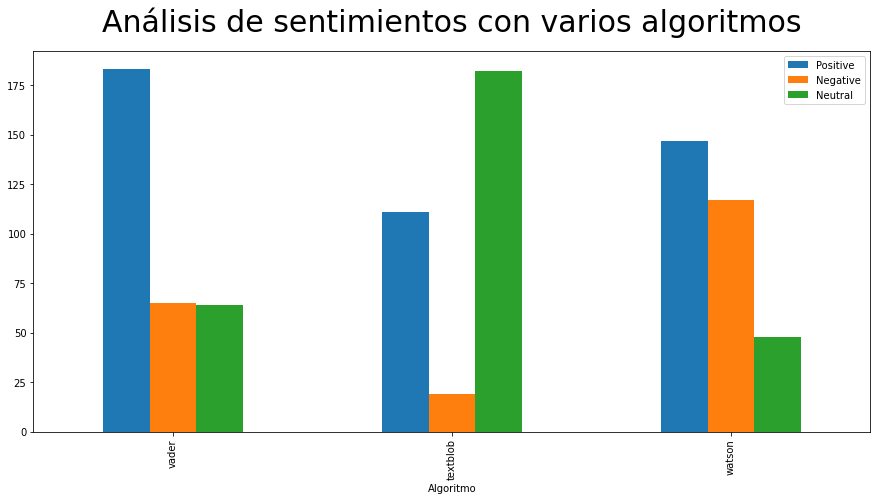

In [24]:
results = [
    [
        'vader',
        len(result_vader[0]),
        len(result_vader[1]),
        len(result_vader[2])
    ],
    [
        'textblob',
        len(result_textblob[0]),
        len(result_textblob[1]),
        len(result_textblob[2])
    ],
    [
        'watson',
        len(result_watson[0]),
        len(result_watson[1]),
        len(result_watson[2])
    ]
]

results_df = pd.DataFrame(results, columns=['Algoritmo', 'Positive', 'Negative', 'Neutral'])
results_df.plot(kind='bar', x='Algoritmo', stacked=False, figsize=(15, 7))
title = 'Análisis de sentimientos con varios algoritmos'
plt.title(title, fontdict={'family': 'sans', 'color': 'black', 'size': 30}, pad=20)
plt.show()

## Ensemble techniques

In [44]:
from collections import Counter
  
def most_frequent(items):
    occurence_count = Counter(items)
    return occurence_count.most_common(1)[0][0]

def generate_classified_dataframe(dataframe, column_name):
    data = []
    
    for text in dataframe[column_name]:
        scores = [
            get_vader_score(str(text)),
            get_textblob_score(str(text)),
            get_ibmwatson_score(str(text))
        ]
        
        for i in range(len(scores)):
            if scores[i] > 0.15:
                scores[i] = 1
            elif scores[i] < -0.15:
                scores[i] = -1
            else:
                scores[i] = 0
        
        data.append([
            text,
            scores[0],
            scores[1],
            scores[2],
            most_frequent(scores)
        ])
            
    return pd.DataFrame(data, columns=['Answer', 'Vader', 'Textblob', 'Watson', 'MaxVoting'])
    #return pd.DataFrame(data, columns=['Answer', 'Vader', 'Textblob', 'MaxVoting'])

# TODO: Aquí separar respuestas positivas, negativas y neutrales para la generación de las wordclouds.

In [45]:
classified_df = generate_classified_dataframe(df_tmp, 'other_ideas')
classified_df

Answer  Vader  Textblob  \
0    Sustainability involves planning for nature, n...      0         0   
1    The city can't even take care of issues that p...     -1         0   
2    Water is a much bigger problem than this surve...      0         1   
3    As much as climate change is important, I am m...     -1         1   
4    In my neighborhood, infill has become instuff....      1         0   
..                                                 ...    ...       ...   
307  Thank you for doing this. I just moved to Tucs...      1         1   
308  City "Leaders" need to lead by example. For in...      1         1   
309                                  not at the moment      0         0   
310  Subsidizing solar for individual dwellings may...      1         0   
311  City transit is very wasteful in most parts of...      1         0   

     Watson  MaxVoting  
0        -1          0  
1        -1         -1  
2        -1          0  
3        -1         -1  
4        -1          1  
..      ...        ...  
307       1          1  
308       1          1  
309      -1          0  
310       1          1  
311      -1          1  

[312 rows x 5 columns]

In [54]:
classified_df.head(15)

Answer  Vader  Textblob  \
0   Sustainability involves planning for nature, n...      0         0   
1   The city can't even take care of issues that p...     -1         0   
2   Water is a much bigger problem than this surve...      0         1   
3   As much as climate change is important, I am m...     -1         1   
4   In my neighborhood, infill has become instuff....      1         0   
5   Great that you are seeking community input, bu...      1         0   
6   The community I am in Armory Park Del Sol has ...      1         1   
7                            Thank you for your work!      1         0   
8   Do not use the planting trees and green spaces...     -1         0   
9                              Cleanup old landfills.      0         0   
10                    Thank you creating this survey!      1         0   
11  just FYI -- we participated in the cities reba...      1         1   
12  Thank you for your efforts to reach out to the...      1         0   
13  You would have my full support to implement AL...      1         1   
14  You are preparing to shove onerous new guideli...      0         0   

    Watson  MaxVoting  
0       -1          0  
1       -1         -1  
2       -1          0  
3       -1         -1  
4       -1          1  
5        1          1  
6        1          1  
7        1          1  
8        1         -1  
9        0          0  
10       1          1  
11      -1          1  
12       1          1  
13       1          1  
14      -1          0

In [53]:
#

from sklearn.feature_extraction.text import CountVectorizer

data = []
data_labels = []

with open("./pos_tweets.txt") as f:
    for i in f: 
        data.append(i) 
        data_labels.append('pos')

with open("./neg_tweets.txt") as f:
    for i in f: 
        data.append(i)
        data_labels.append('neg')
        
vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
)

features = vectorizer.fit_transform(
    data
)

features_nd = features.toarray() # for easy usage

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        features_nd,
        data_labels,
        train_size=0.80, 
        random_state=1234)

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(X=X_train, y=y_train)
y_pred = log_model.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.800498753117207


### Max voting

### Neural network

## Wordclouds por sentimiento

### Other ideas

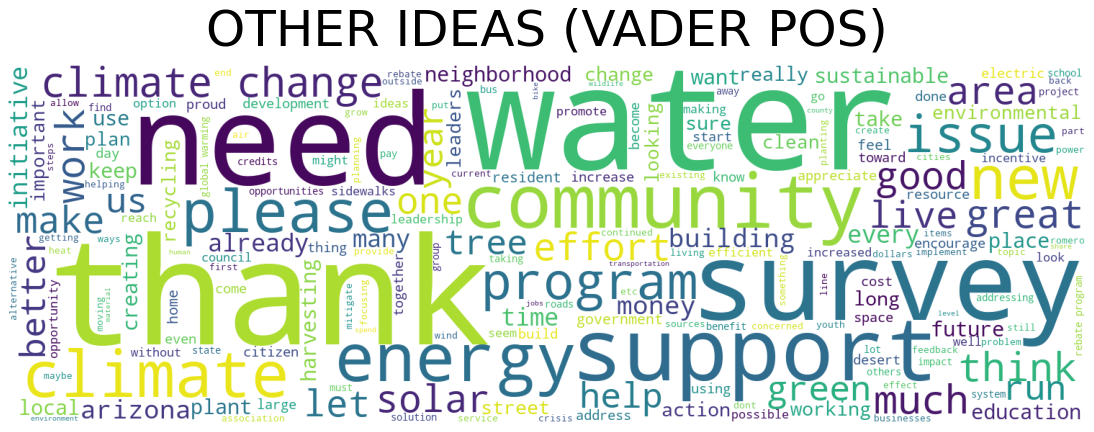

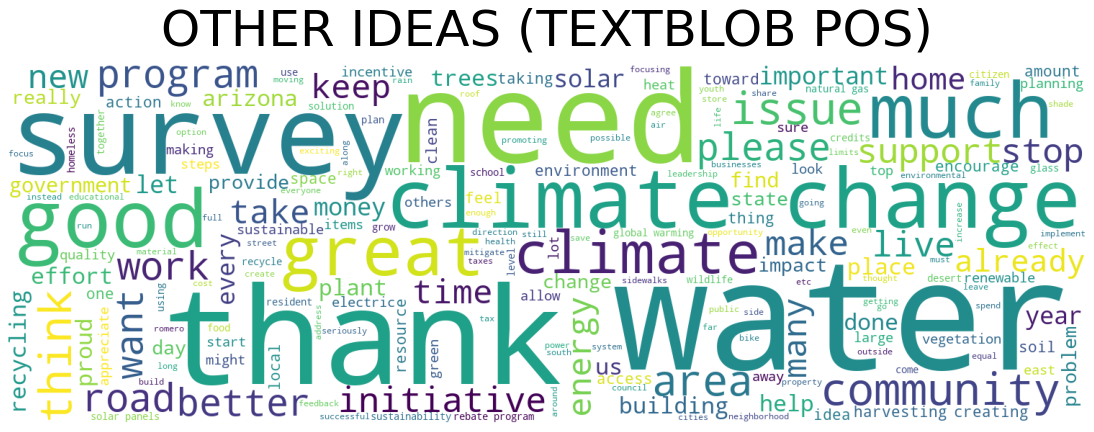

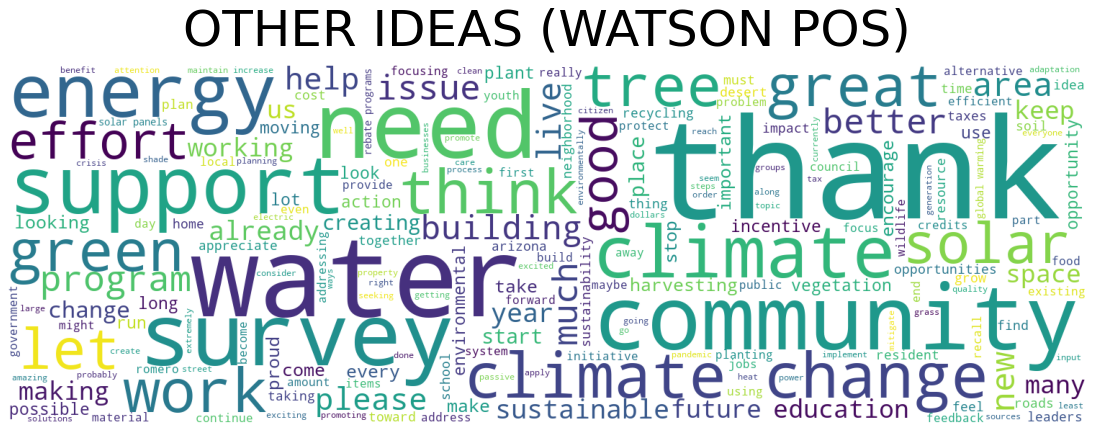

In [15]:
generate_sentiment_word_cloud(result_vader[0], 'OTHER IDEAS (VADER POS)')
generate_sentiment_word_cloud(result_textblob[0], 'OTHER IDEAS (TEXTBLOB POS)')
generate_sentiment_word_cloud(result_watson[0], 'OTHER IDEAS (WATSON POS)')

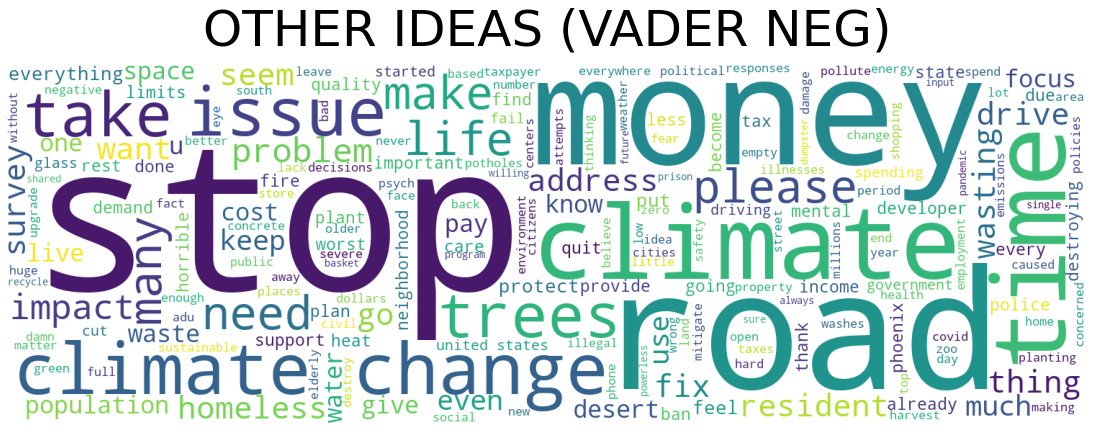

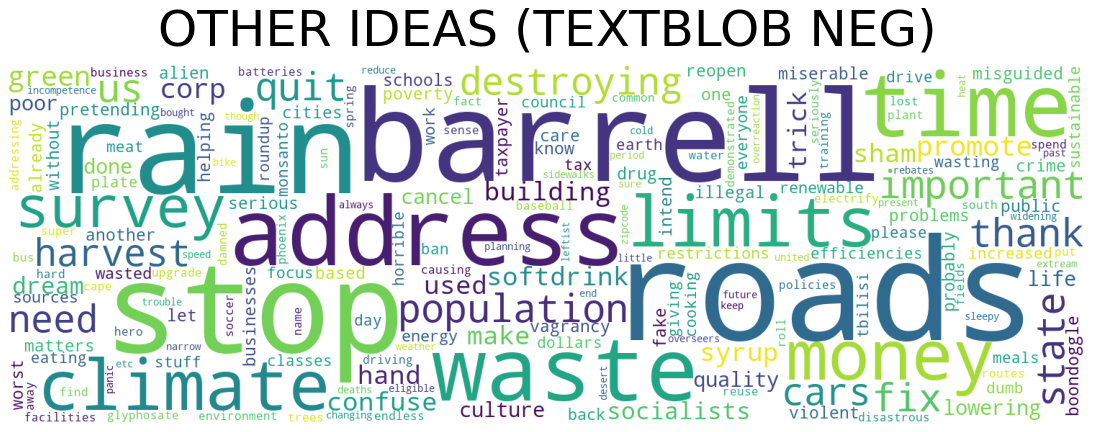

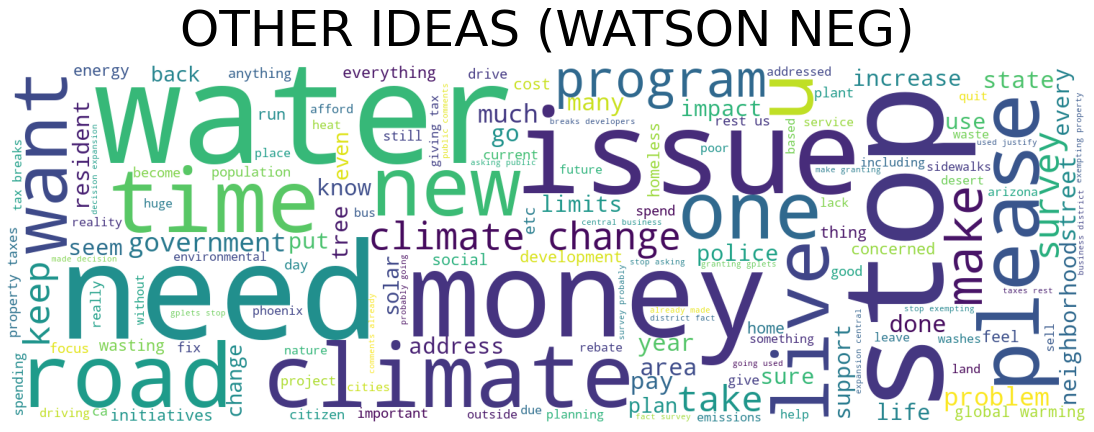

In [16]:
generate_sentiment_word_cloud(result_vader[1], 'OTHER IDEAS (VADER NEG)')
generate_sentiment_word_cloud(result_textblob[1], 'OTHER IDEAS (TEXTBLOB NEG)')
generate_sentiment_word_cloud(result_watson[1], 'OTHER IDEAS (WATSON NEG)')

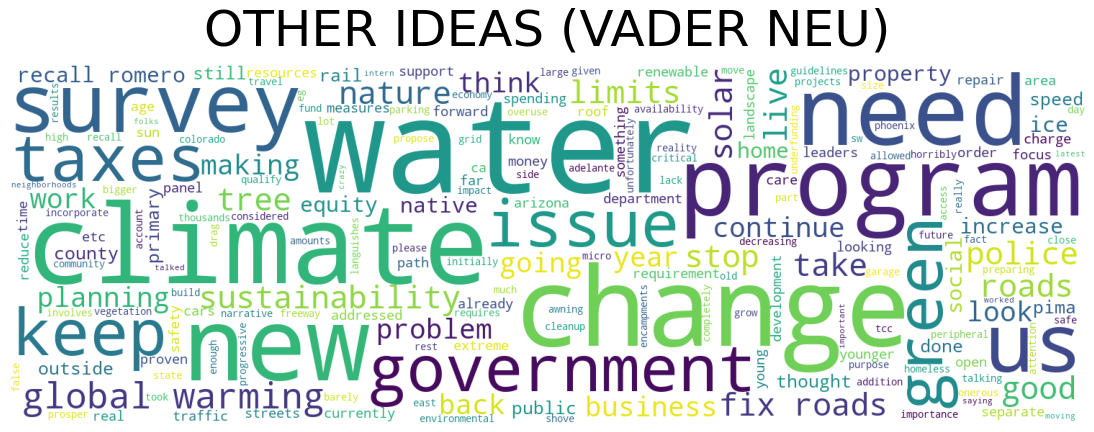

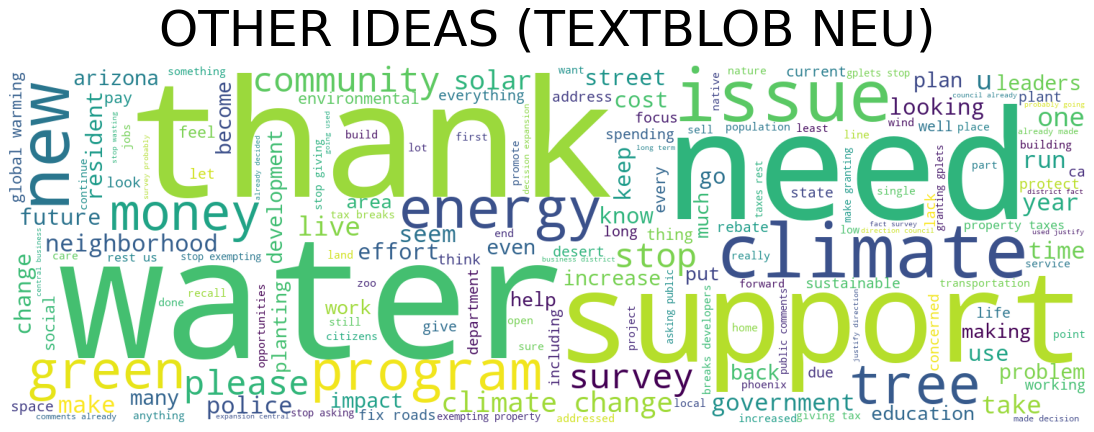

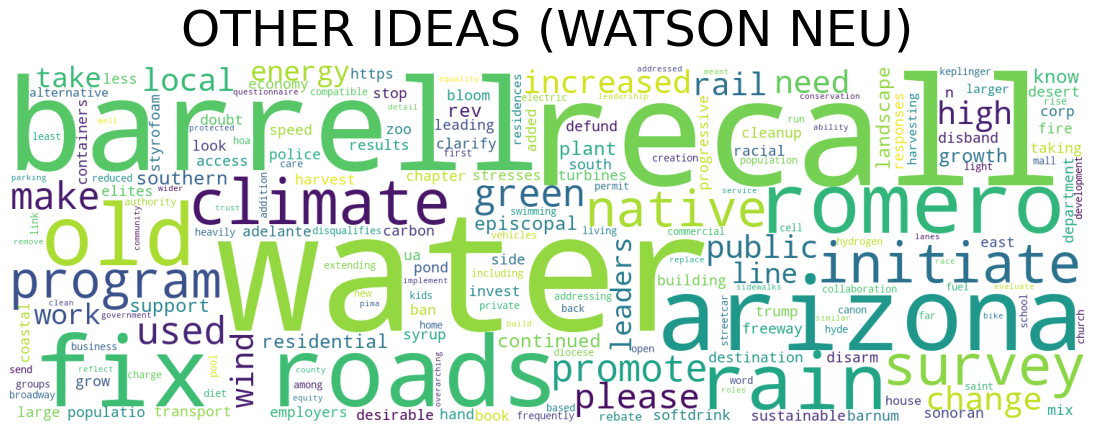

In [17]:
generate_sentiment_word_cloud(result_vader[2], 'OTHER IDEAS (VADER NEU)')
generate_sentiment_word_cloud(result_textblob[2], 'OTHER IDEAS (TEXTBLOB NEU)')
generate_sentiment_word_cloud(result_watson[2], 'OTHER IDEAS (WATSON NEU)')